In [1]:
# Importing all Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset in a dataframe using python
df = pd.read_csv("Auto_Insurance_Claims_amount.csv",parse_dates=["Effective To Date"])

In [3]:
df

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2011-02-24,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,2011-01-31,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2011-02-19,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,2011-01-20,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2011-02-03,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2011-02-10,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2011-02-12,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2011-02-06,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2011-02-03,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [4]:
# shape of the data
df.shape

(9134, 26)

In [5]:
# data types
df.dtypes                        

Customer                                 object
Country                                  object
State Code                               object
State                                    object
Claim Amount                            float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   Country                        9134 non-null   object        
 2   State Code                     9134 non-null   object        
 3   State                          9134 non-null   object        
 4   Claim Amount                   9134 non-null   float64       
 5   Response                       9134 non-null   object        
 6   Coverage                       9134 non-null   object        
 7   Education                      9134 non-null   object        
 8   Effective To Date              9134 non-null   datetime64[ns]
 9   EmploymentStatus               9134 non-null   object        
 10  Gender                         9134 non-null   object        
 11  Income           

Now, the summary shows that  there are no null values in the data set

In [7]:
# columns inside the data
df.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
# printing here unique values of  categorical columns with their respective counts
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("*********************************************************************************")

Customer : ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
NQ18750    1
SN21895    1
ZX68434    1
PZ94551    1
MF83904    1
          ..
EN77569    1
LK57294    1
CC16034    1
PE63707    1
BL79888    1
Name: Customer, Length: 9134, dtype: int64
*********************************************************************************
Country : ['US']
US    9134
Name: Country, dtype: int64
*********************************************************************************
State Code : ['KS' 'NE' 'OK' 'MO' 'IA']
MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64
*********************************************************************************
State : ['Kansas' 'Nebraska' 'Oklahoma' 'Missouri' 'Iowa']
Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64
*********************************************************************************
Response : ['No' 'Yes']
No     7826
Yes    1308
Name: Res

In [9]:
df["Effective To Date"].unique()   

array(['2011-02-24T00:00:00.000000000', '2011-01-31T00:00:00.000000000',
       '2011-02-19T00:00:00.000000000', '2011-01-20T00:00:00.000000000',
       '2011-02-03T00:00:00.000000000', '2011-01-25T00:00:00.000000000',
       '2011-01-18T00:00:00.000000000', '2011-01-26T00:00:00.000000000',
       '2011-02-17T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', '2011-02-06T00:00:00.000000000',
       '2011-01-10T00:00:00.000000000', '2011-01-17T00:00:00.000000000',
       '2011-01-05T00:00:00.000000000', '2011-02-27T00:00:00.000000000',
       '2011-01-14T00:00:00.000000000', '2011-01-21T00:00:00.000000000',
       '2011-02-05T00:00:00.000000000', '2011-01-29T00:00:00.000000000',
       '2011-02-28T00:00:00.000000000', '2011-02-12T00:00:00.000000000',
       '2011-02-02T00:00:00.000000000', '2011-02-07T00:00:00.000000000',
       '2011-01-22T00:00:00.000000000', '2011-02-13T00:00:00.000000000',
       '2011-01-15T00:00:00.000000000', '2011-01-08

In [10]:
len(df["Effective To Date"].unique())

59

In [11]:
# Extracting months,day,year from Effective To Date column
f_claims_date = pd.DataFrame()
df_claims_date["months"]=df["Effective To Date"].dt.month_name()
df_claims_date["year"]=df["Effective To Date"].dt.year
df_claims_date["day"]=df["Effective To Date"].dt.day_name()
df_claims_date["claim amount"]=df["Claim Amount"]

In [12]:
df_claims_date

,months,year,day,claim amount
0,February,2011,Thursday,276.351928
1,January,2011,Monday,697.953590
2,February,2011,Saturday,1288.743165
3,January,2011,Thursday,764.586183
4,February,2011,Thursday,281.369258
...,...,...,...,...
9129,February,2011,Thursday,2340.598798
9130,February,2011,Saturday,309.651122
9131,February,2011,Sunday,816.389043
9132,February,2011,Thursday,752.444244


In [13]:
df_months=df_claims_date.groupby("months",axis=0).sum()

In [14]:
df_n=df_months.drop("year",axis=1)

In [15]:
df_n

,claim amount
months,
February,3.371816e+06
January,3.939896e+06


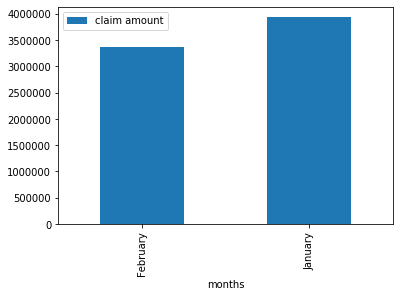

In [16]:
df_n.plot(kind="bar")

Above Bar plot shows that in the month of January there were more claims when compared with February claim amount

In [17]:
df_dates =pd.DataFrame()

df_dates["Effective To Date"] = df["Effective To Date"]

df_dates["Claim amount"] = df["Claim Amount"]

In [18]:
df_dates

,Effective To Date,Claim amount
0,2011-02-24,276.351928
1,2011-01-31,697.953590
2,2011-02-19,1288.743165
3,2011-01-20,764.586183
4,2011-02-03,281.369258
...,...,...
9129,2011-02-10,2340.598798
9130,2011-02-12,309.651122
9131,2011-02-06,816.389043
9132,2011-02-03,752.444244


In [19]:
# reset index for visualization of total Claim amounts corresponding to a particular date
df_dates=df_dates.groupby("Effective To Date",axis=0).sum()

df_dates.reset_index(inplace=True)

In [20]:
df_dates

,Effective To Date,Claim amount
0,2011-01-01,135368.242603
1,2011-01-02,127105.660038
2,2011-01-03,132743.348306
3,2011-01-04,87980.425960
4,2011-01-05,127795.012543
5,2011-01-06,116676.290263
6,2011-01-07,124648.516978
7,2011-01-08,111468.106756
8,2011-01-09,118766.234393
9,2011-01-10,140917.710982


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

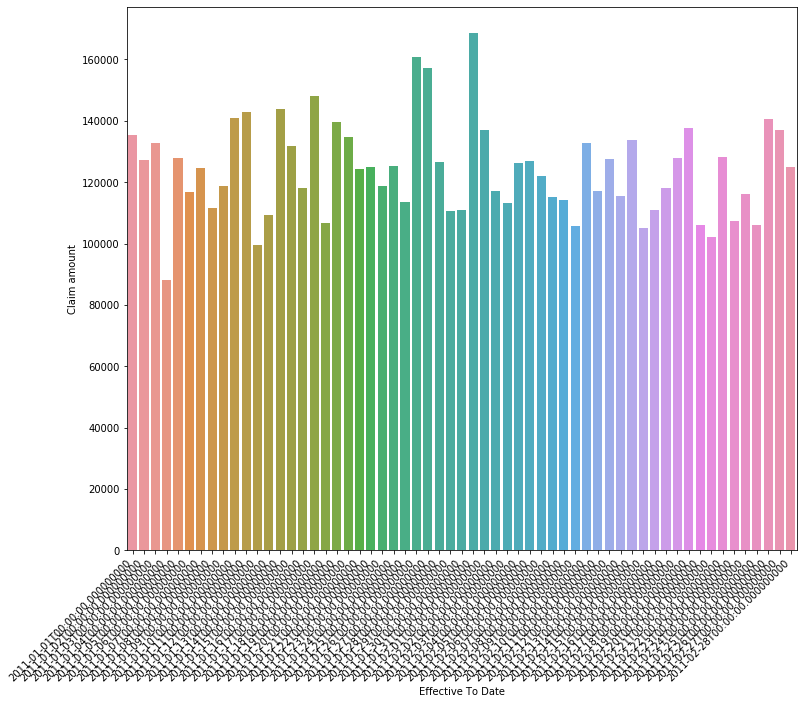

In [21]:
f,ax=plt.subplots(figsize=(12,10))
sns.barplot(x="Effective To Date",y="Claim amount",data=df_dates,ax=ax)
plt.xticks(rotation=45,ha="right")

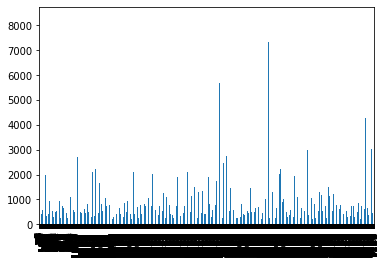

In [22]:
df["Claim Amount"].plot(kind="bar")

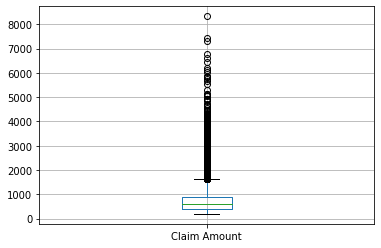

In [23]:
df.boxplot(column="Claim Amount")

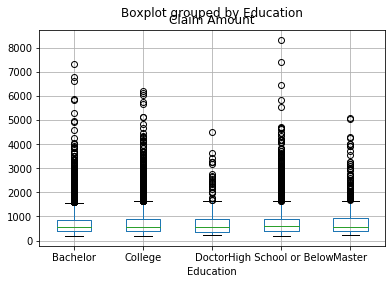

In [24]:
df.boxplot(column="Claim Amount",by="Education")

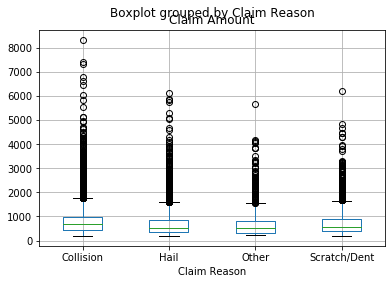

In [25]:
df.boxplot(column="Claim Amount",by="Claim Reason")

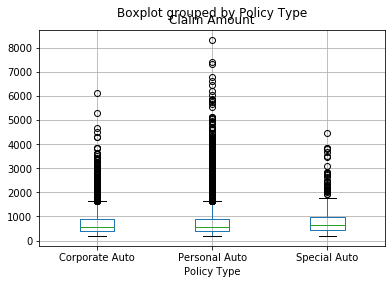

In [26]:
df.boxplot(column="Claim Amount",by="Policy Type")

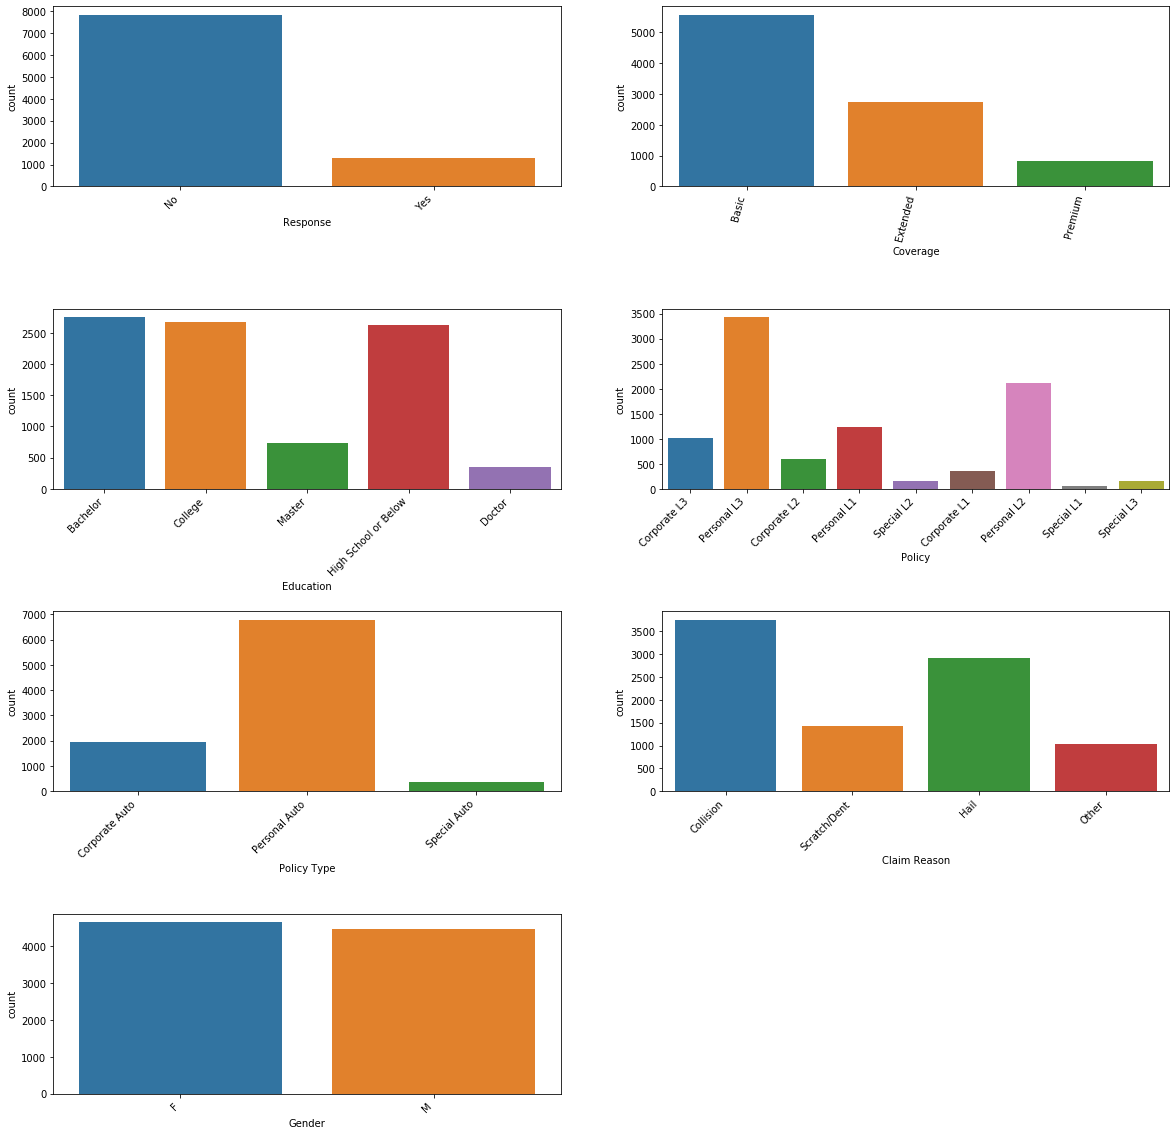

In [28]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.68)
fig.delaxes(axs[3][1])



re_plot = sns.countplot(df['Response'], ax=axs[0][0])
re_plot.set_xticklabels(re_plot.get_xticklabels(), rotation=45, ha="right")


cov_plot = sns.countplot(df['Coverage'], ax=axs[0][1])
cov_plot.set_xticklabels(cov_plot.get_xticklabels(), rotation=75, ha="right")


ed_plot = sns.countplot(df['Education'],ax=axs[1][0])
ed_plot.set_xticklabels(ed_plot.get_xticklabels(), rotation=45, ha="right")


pol_plot = sns.countplot(df['Policy'], ax=axs[1][1])
pol_plot.set_xticklabels(pol_plot.get_xticklabels(), rotation=45, ha="right")


pty_plot = sns.countplot(df['Policy Type'], ax=axs[2][0])
pty_plot.set_xticklabels(pty_plot.get_xticklabels(), rotation=45, ha="right")


cl_plot = sns.countplot(df['Claim Reason'], ax=axs[2][1])
cl_plot.set_xticklabels(cl_plot.get_xticklabels(), rotation=45, ha="right")


ge_plot = sns.countplot(df['Gender'], ax=axs[3][0])
ge_plot.set_xticklabels(ge_plot.get_xticklabels(), rotation=45, ha="right")



plt.show()

Above graphs shows that:

  * Basic coverage was more as compared to extended and premium

  * Most nos of policy type were Personal Auto

  * Highest nos of Policy was Personal L3

  * Collision was the main reason behind most nos of Claims

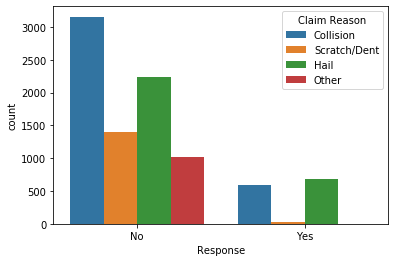

In [29]:
sns.countplot(df["Response"],hue=df["Claim Reason"])

In [30]:
# dropping here irrelevant columns
df.drop(columns=["Customer","Country","State Code","Effective To Date"],inplace=True)

In [31]:
df

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Missouri,2340.598798,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,Missouri,309.651122,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,Missouri,816.389043,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,Missouri,752.444244,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [32]:
# Using LabelEncoder converting the labels into numeric form so as to convert it into the machine-readable form.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == object:
        df[column]=le.fit_transform(df[column])

In [33]:
df

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,276.351928,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,3,697.953590,0,1,0,4,0,0,1,2,...,42,0,8,1,5,3,0,1131.464935,0,1
2,4,1288.743165,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,2,764.586183,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,1,281.369258,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2,2340.598798,0,0,0,1,1,71941,2,1,...,89,0,2,1,3,1,3,198.234764,0,1
9130,2,309.651122,1,1,1,1,0,21604,1,0,...,28,0,1,0,2,0,1,379.200000,0,1
9131,2,816.389043,0,1,0,4,1,0,1,2,...,37,3,2,0,1,0,1,790.784983,0,1
9132,2,752.444244,0,1,1,1,1,21941,1,1,...,3,0,3,1,4,3,1,691.200000,0,0


In [34]:
dfcor = df.corr()

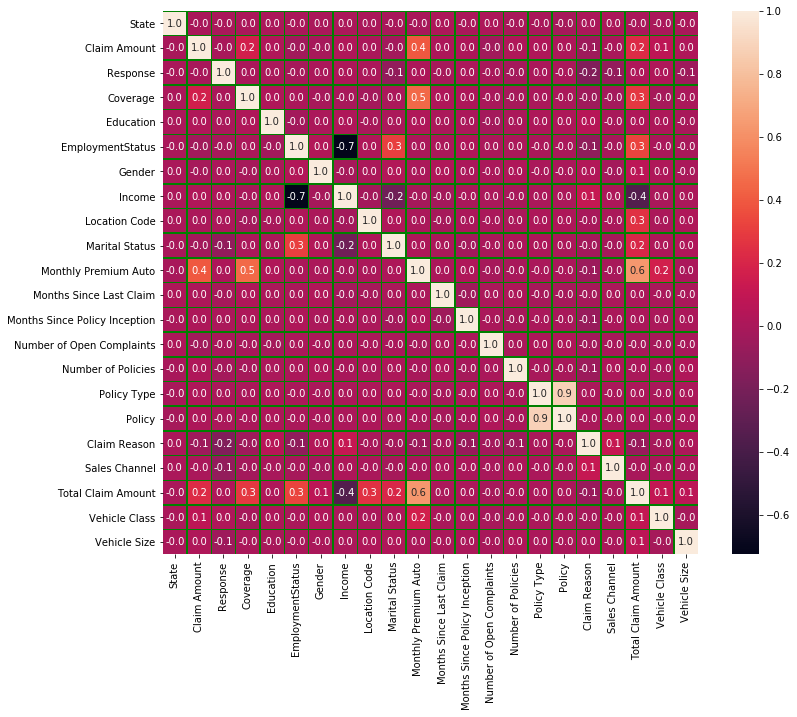

In [35]:
# Checking correlation using heatmap
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(dfcor,annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()

In [36]:
#Separating cateogorical columns of the data 
dataset = pd.get_dummies(df,columns=['Coverage','Education','EmploymentStatus','Gender','Location Code','Marital Status',
                                           'Policy Type','Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size'])

In [37]:
#scaling columns having continuous values as their input
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
columns_to_scale = ['Claim Amount','Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception',
                    'Number of Open Complaints','Number of Policies','Total Claim Amount']
dataset[columns_to_scale] = scale.fit_transform(dataset[columns_to_scale]) 

In [38]:
dataset.columns

Index(['State', 'Claim Amount', 'Response', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'Coverage_0', 'Coverage_1', 'Coverage_2', 'Education_0', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'EmploymentStatus_0',
       'EmploymentStatus_1', 'EmploymentStatus_2', 'EmploymentStatus_3',
       'EmploymentStatus_4', 'Gender_0', 'Gender_1', 'Location Code_0',
       'Location Code_1', 'Location Code_2', 'Marital Status_0',
       'Marital Status_1', 'Marital Status_2', 'Policy Type_0',
       'Policy Type_1', 'Policy Type_2', 'Policy_0', 'Policy_1', 'Policy_2',
       'Policy_3', 'Policy_4', 'Policy_5', 'Policy_6', 'Policy_7', 'Policy_8',
       'Claim Reason_0', 'Claim Reason_1', 'Claim Reason_2', 'Claim Reason_3',
       'Sales Channel_0', 'Sales Channel_1', 'Sales Channel_2',
       'Sales Channel_3', 'Vehicle Class_0', 'Veh

In [39]:
dataset.drop(columns=["Coverage_2","Education_4","EmploymentStatus_4","Location Code_2","Marital Status_2","Policy Type_2",
                      "Policy_8","Claim Reason_3","Sales Channel_3","Vehicle Class_5","Vehicle Size_2"],inplace=True)

In [40]:
dataset.head()

,State,Claim Amount,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,...,Sales Channel_0,Sales Channel_1,Sales Channel_2,Vehicle Class_0,Vehicle Class_1,Vehicle Class_2,Vehicle Class_3,Vehicle Class_4,Vehicle Size_0,Vehicle Size_1
0,1,-0.762878,0,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640,...,1,0,0,0,0,0,0,0,0,1
1,3,-0.149245,0,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737,...,1,0,0,1,0,0,0,0,0,1
2,4,0.710636,0,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734,...,1,0,0,0,0,0,0,0,0,1
3,2,-0.052263,0,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769,...,0,0,1,0,0,0,1,0,0,1
4,1,-0.755575,0,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843,...,1,0,0,1,0,0,0,0,0,1


In [41]:
x=dataset.drop("Claim Amount",axis=1)
y=dataset["Claim Amount"]

In [51]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(data=x)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=48,test_size=0.40)

In [43]:
# defining a common function here for all Regression model and there by finding the best random state having highest r2 score
regr  = LinearRegression()
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)
    return final_r_state

In [44]:
# Using LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.15517233054753043
r2 score corresponding to 43 is 0.1558241664470541
r2 score corresponding to 44 is 0.1421840010513764
r2 score corresponding to 45 is 0.15942434324502663
r2 score corresponding to 46 is 0.17292257227165375
r2 score corresponding to 47 is 0.18357943187476133
r2 score corresponding to 48 is 0.1831502927522275
r2 score corresponding to 49 is 0.16452741041079322
r2 score corresponding to 50 is 0.17533313976465648
r2 score corresponding to 51 is 0.12494659275693654
r2 score corresponding to 52 is 0.15470047484584515
r2 score corresponding to 53 is 0.15523141028432108
r2 score corresponding to 54 is 0.12642654394114827
r2 score corresponding to 55 is 0.17429159648063275
r2 score corresponding to 56 is 0.14761319489466407
r2 score corresponding to 57 is 0.1463664806964723
r2 score corresponding to 58 is 0.1586132055695456
r2 score corresponding to 59 is 0.14369440827321522
r2 score corresponding to 60 is 0.15128953926891253
r2 score correspo

In [45]:
## Using GridSearchCV to find out the best parameters of the KNeighborsRegressor model
neighbors = {"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 23}

In [46]:
# Using the best parameter obtained above finding out the best random sate of KNeighborsRegressor having highest r2 score
knr=KNeighborsRegressor(n_neighbors=23)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.16785811487419622
r2 score corresponding to 43 is 0.16765711496611058
r2 score corresponding to 44 is 0.1836659827359628
r2 score corresponding to 45 is 0.19423294388675172
r2 score corresponding to 46 is 0.18556772959523005
r2 score corresponding to 47 is 0.18711704123937745
r2 score corresponding to 48 is 0.21001169230700856
r2 score corresponding to 49 is 0.19199092476803425
r2 score corresponding to 50 is 0.18094361718481922
r2 score corresponding to 51 is 0.15238286840155668
r2 score corresponding to 52 is 0.18489051459545403
r2 score corresponding to 53 is 0.19464124602317545
r2 score corresponding to 54 is 0.16213964843432904
r2 score corresponding to 55 is 0.2116893794718332
r2 score corresponding to 56 is 0.15580898867289394
r2 score corresponding to 57 is 0.16826091595796966
r2 score corresponding to 58 is 0.19348083489093404
r2 score corresponding to 59 is 0.16197436592080727
r2 score corresponding to 60 is 0.1769767845539001
r2 score corres

In [52]:
# Lets check whether our results gets boosted or not by first finding best parameters of GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [53]:
# Using the best parameter obtained above finding out the best random sate of GradientBoostingRegressor having highest r2 score
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to 42 is 0.6690995198003513
r2 score corresponding to 43 is 0.6690155765842577
r2 score corresponding to 44 is 0.6643914362754391
r2 score corresponding to 45 is 0.6861242331606654
r2 score corresponding to 46 is 0.6691172590270287
r2 score corresponding to 47 is 0.7049038462292103
r2 score corresponding to 48 is 0.7014072973678518
r2 score corresponding to 49 is 0.6773576060858915
r2 score corresponding to 50 is 0.680177976884401
r2 score corresponding to 51 is 0.6757432175295166
r2 score corresponding to 52 is 0.6539940321511487
r2 score corresponding to 53 is 0.6601749999989523
r2 score corresponding to 54 is 0.6706417970648277
r2 score corresponding to 55 is 0.6827214689401326
r2 score corresponding to 56 is 0.6740690934870965
r2 score corresponding to 57 is 0.6851000745752487
r2 score corresponding to 58 is 0.661352549694465
r2 score corresponding to 59 is 0.6860570067847196
r2 score corresponding to 60 is 0.6688824009969564
r2 score corresponding to 61 is 0

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=87,test_size=0.20)
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000,random_state=87)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [56]:
gbrscore=gbr.score(x_train,y_train)
print(gbrscore*100)

72.01515260724638


In [57]:
from sklearn.externals import joblib

In [58]:
#Save the model as a pickle in a file
joblib.dump(gbr,"gbrinsurance.pkl")

['gbrinsurance.pkl']

In [59]:
model=joblib.load("gbrinsurance.pkl")